# DATA CLEANING and DATA PREPPING

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data_path = "diabetic_data.csv"  
diabetic_data = pd.read_csv(data_path)
diabetic_data

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [2]:
diabetic_data.replace('?', pd.NA, inplace=True)
columns_to_drop = ['encounter_id', 'patient_nbr', 'weight']  
diabetic_data_cleaned = diabetic_data.drop(columns=columns_to_drop)

diabetic_data_cleaned['readmitted'] = diabetic_data_cleaned['readmitted'].map({'NO': 0, '>30': 1, '<30': 2})

diabetic_data_cleaned['gender'] = diabetic_data_cleaned['gender'].map({'Female': 1, 'Male': 0})

age_mapping = {'[0-10)': 5, '[10-20)': 15, '[20-30)': 25, '[30-40)': 35, '[40-50)': 45,
               '[50-60)': 55, '[60-70)': 65, '[70-80)': 75, '[80-90)': 85, '[90-100)': 95}
diabetic_data_cleaned['age'] = diabetic_data_cleaned['age'].map(age_mapping)

# missing_values_after_cleaning = diabetic_data_cleaned.isnull().sum()

diabetic_data_cleaned

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,1.0,5,6,25,1,1,<NA>,Pediatrics-Endocrinology,41,...,No,No,No,No,No,No,No,No,No,0
1,Caucasian,1.0,15,1,1,7,3,<NA>,<NA>,59,...,No,Up,No,No,No,No,No,Ch,Yes,1
2,AfricanAmerican,1.0,25,1,1,7,2,<NA>,<NA>,11,...,No,No,No,No,No,No,No,No,Yes,0
3,Caucasian,0.0,35,1,1,7,2,<NA>,<NA>,44,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,Caucasian,0.0,45,1,1,7,1,<NA>,<NA>,51,...,No,Steady,No,No,No,No,No,Ch,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,0.0,75,1,3,7,3,MC,<NA>,51,...,No,Down,No,No,No,No,No,Ch,Yes,1
101762,AfricanAmerican,1.0,85,1,4,5,5,MC,<NA>,33,...,No,Steady,No,No,No,No,No,No,Yes,0
101763,Caucasian,0.0,75,1,1,7,1,MC,<NA>,53,...,No,Down,No,No,No,No,No,Ch,Yes,0
101764,Caucasian,1.0,85,2,3,7,10,MC,Surgery-General,45,...,No,Up,No,No,No,No,No,Ch,Yes,0


In [3]:
diabetic_data_cleaned = diabetic_data_cleaned.drop(columns=['payer_code', 'medical_specialty'])
diabetic_data_cleaned['race'].fillna(diabetic_data_cleaned['race'].mode()[0], inplace=True)
diabetic_data_cleaned['gender'].fillna(diabetic_data_cleaned['gender'].mode()[0], inplace=True)

diabetic_data_cleaned['diag_1'].fillna('Unknown', inplace=True)
diabetic_data_cleaned['diag_2'].fillna('Unknown', inplace=True)
diabetic_data_cleaned['diag_3'].fillna('Unknown', inplace=True)

missing_values_after_imputation = diabetic_data_cleaned.isnull().sum()
diabetic_data_cleaned




/var/folders/22/5fkh88m540v5td9ddw54d6_m0000gn/T/ipykernel_25395/550706352.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetic_data_cleaned['race'].fillna(diabetic_data_cleaned['race'].mode()[0], inplace=True)
/var/folders/22/5fkh88m540v5td9ddw54d6_m0000gn/T/ipykernel_25395/550706352.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate o

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,1.0,5,6,25,1,1,41,0,1,...,No,No,No,No,No,No,No,No,No,0
1,Caucasian,1.0,15,1,1,7,3,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,1
2,AfricanAmerican,1.0,25,1,1,7,2,11,5,13,...,No,No,No,No,No,No,No,No,Yes,0
3,Caucasian,0.0,35,1,1,7,2,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,Caucasian,0.0,45,1,1,7,1,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,0.0,75,1,3,7,3,51,0,16,...,No,Down,No,No,No,No,No,Ch,Yes,1
101762,AfricanAmerican,1.0,85,1,4,5,5,33,3,18,...,No,Steady,No,No,No,No,No,No,Yes,0
101763,Caucasian,0.0,75,1,1,7,1,53,0,9,...,No,Down,No,No,No,No,No,Ch,Yes,0
101764,Caucasian,1.0,85,2,3,7,10,45,2,21,...,No,Up,No,No,No,No,No,Ch,Yes,0


In [4]:
max_glu_mapping = {'None': 0, 'Norm': 1, '>200': 2, '>300': 3}
a1c_mapping = {'None': 0, 'Norm': 1, '>7': 2, '>8': 3}

diabetic_data_cleaned['max_glu_serum'] = diabetic_data_cleaned['max_glu_serum'].map(max_glu_mapping)
diabetic_data_cleaned['A1Cresult'] = diabetic_data_cleaned['A1Cresult'].map(a1c_mapping)

for diag_col in ['diag_1', 'diag_2', 'diag_3']:
    diabetic_data_cleaned[diag_col] = diabetic_data_cleaned[diag_col].astype('category').cat.codes

data_types = diabetic_data_cleaned.dtypes
print("Data types of each column:\n", data_types)

readmitted_distribution = diabetic_data_cleaned['readmitted'].value_counts(normalize=True)
print("\nDistribution of the 'readmitted' column:\n", readmitted_distribution)


Data types of each column:
 race                         object
gender                      float64
age                           int64
admission_type_id             int64
discharge_disposition_id      int64
admission_source_id           int64
time_in_hospital              int64
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_outpatient             int64
number_emergency              int64
number_inpatient              int64
diag_1                        int16
diag_2                        int16
diag_3                        int16
number_diagnoses              int64
max_glu_serum               float64
A1Cresult                   float64
metformin                    object
repaglinide                  object
nateglinide                  object
chlorpropamide               object
glimepiride                  object
acetohexamide                object
glipizide                    object
glyburide                    object


In [5]:
medication_columns = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 
                      'glyburide', 'pioglitazone', 'insulin']

medication_mapping = {'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3}

for col in medication_columns:
    diabetic_data_cleaned[col] = diabetic_data_cleaned[col].map(medication_mapping)
diabetic_data_cleaned['change'] = diabetic_data_cleaned['change'].map({'No': 0, 'Ch': 1}).fillna(0)
diabetic_data_cleaned['diabetesMed'] = diabetic_data_cleaned['diabetesMed'].map({'No': 0, 'Yes': 1})


diabetic_data_cleaned

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,1.0,5,6,25,1,1,41,0,1,...,No,0,No,No,No,No,No,0,0,0
1,Caucasian,1.0,15,1,1,7,3,59,0,18,...,No,2,No,No,No,No,No,1,1,1
2,AfricanAmerican,1.0,25,1,1,7,2,11,5,13,...,No,0,No,No,No,No,No,0,1,0
3,Caucasian,0.0,35,1,1,7,2,44,1,16,...,No,2,No,No,No,No,No,1,1,0
4,Caucasian,0.0,45,1,1,7,1,51,0,8,...,No,1,No,No,No,No,No,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,0.0,75,1,3,7,3,51,0,16,...,No,3,No,No,No,No,No,1,1,1
101762,AfricanAmerican,1.0,85,1,4,5,5,33,3,18,...,No,1,No,No,No,No,No,0,1,0
101763,Caucasian,0.0,75,1,1,7,1,53,0,9,...,No,3,No,No,No,No,No,1,1,0
101764,Caucasian,1.0,85,2,3,7,10,45,2,21,...,No,2,No,No,No,No,No,1,1,0


In [6]:
diabetic_data_cleaned[medication_columns] = diabetic_data_cleaned[medication_columns].fillna(0)
diabetic_data_cleaned[medication_columns].isnull().sum()


metformin         0
repaglinide       0
nateglinide       0
chlorpropamide    0
glimepiride       0
glipizide         0
glyburide         0
pioglitazone      0
insulin           0
dtype: int64

In [9]:
diabetic_data_cleaned

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,1.0,5,6,25,1,1,41,0,1,...,No,0,No,No,No,No,No,0,0,0
1,Caucasian,1.0,15,1,1,7,3,59,0,18,...,No,2,No,No,No,No,No,1,1,1
2,AfricanAmerican,1.0,25,1,1,7,2,11,5,13,...,No,0,No,No,No,No,No,0,1,0
3,Caucasian,0.0,35,1,1,7,2,44,1,16,...,No,2,No,No,No,No,No,1,1,0
4,Caucasian,0.0,45,1,1,7,1,51,0,8,...,No,1,No,No,No,No,No,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,0.0,75,1,3,7,3,51,0,16,...,No,3,No,No,No,No,No,1,1,1
101762,AfricanAmerican,1.0,85,1,4,5,5,33,3,18,...,No,1,No,No,No,No,No,0,1,0
101763,Caucasian,0.0,75,1,1,7,1,53,0,9,...,No,3,No,No,No,No,No,1,1,0
101764,Caucasian,1.0,85,2,3,7,10,45,2,21,...,No,2,No,No,No,No,No,1,1,0


In [8]:
diabetic_data_cleaned.to_csv('cleaned_diabetic_data_final_V.csv', index=False)

#                                              EXPLORATORY DATA ANALYSIS

### How do demographic factors (age, gender, race) affect readmission rates?

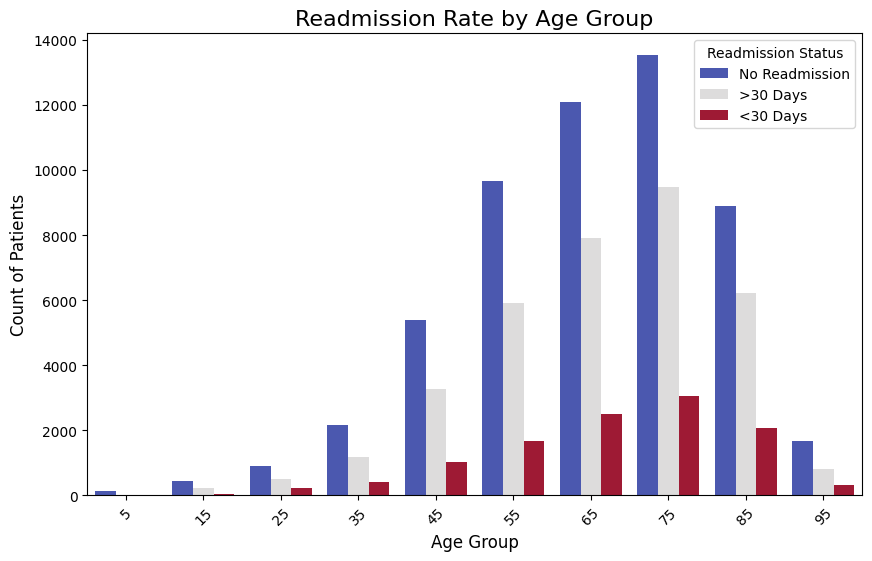

In [11]:
# Bar plot showing readmission rate by age group
plt.figure(figsize=(10, 6))
sns.countplot(data=diabetic_data_cleaned, x='age', hue='readmitted', palette='coolwarm')
plt.title('Readmission Rate by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count of Patients', fontsize=12)
plt.legend(title='Readmission Status', labels=['No Readmission', '>30 Days', '<30 Days'])
plt.xticks(rotation=45)
plt.show()

**1. Age vs. Readmission Rate (Bar Plot)
Plot Description: This plot shows how different age groups are associated with readmission rates.

 Insights:
Older Age Groups: Patients in the age groups 60-80 and 80-100 show higher overall counts of readmission, particularly in the <30 days category.

Younger Age Groups: Patients in the younger age groups (<40) have lower overall readmission rates. The <30 days readmission is almost negligible for younger patients.

Conclusion: Readmission rates increase with age, especially for patients over 60, suggesting that older patients are at higher risk of being readmitted within 30 days.**

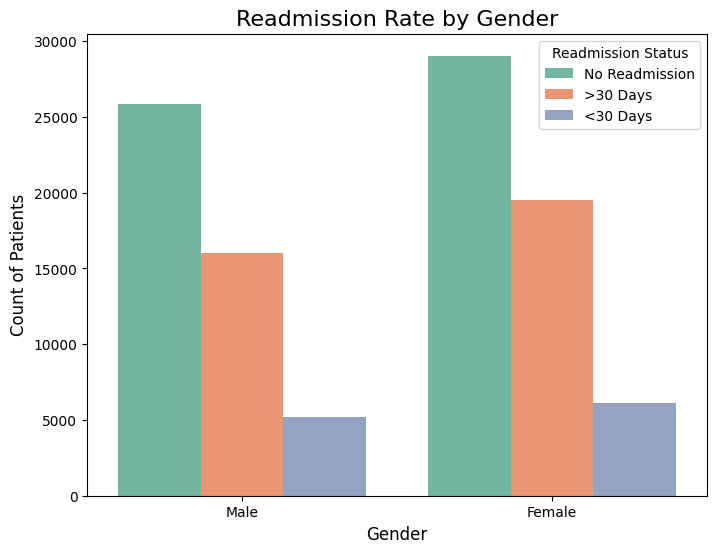

In [12]:
# Bar plot showing readmission rate by gender
plt.figure(figsize=(8, 6))
sns.countplot(data=diabetic_data_cleaned, x='gender', hue='readmitted', palette='Set2')
plt.title('Readmission Rate by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count of Patients', fontsize=12)
plt.legend(title='Readmission Status', labels=['No Readmission', '>30 Days', '<30 Days'])
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()


**Plot Description: This plot visualizes the distribution of readmissions for male and female patients.

Insights:

Gender Distribution: The readmission rate for both males and females is relatively similar. However, female patients have a slightly higher count of <30 days readmissions compared to males.

No Significant Gender Disparity: There is no stark difference between males and females when it comes to readmission, with both genders having similar proportions.

Conclusion: Gender does not appear to be a significant differentiator for readmission rates, with both male and female patients showing similar trends.
**

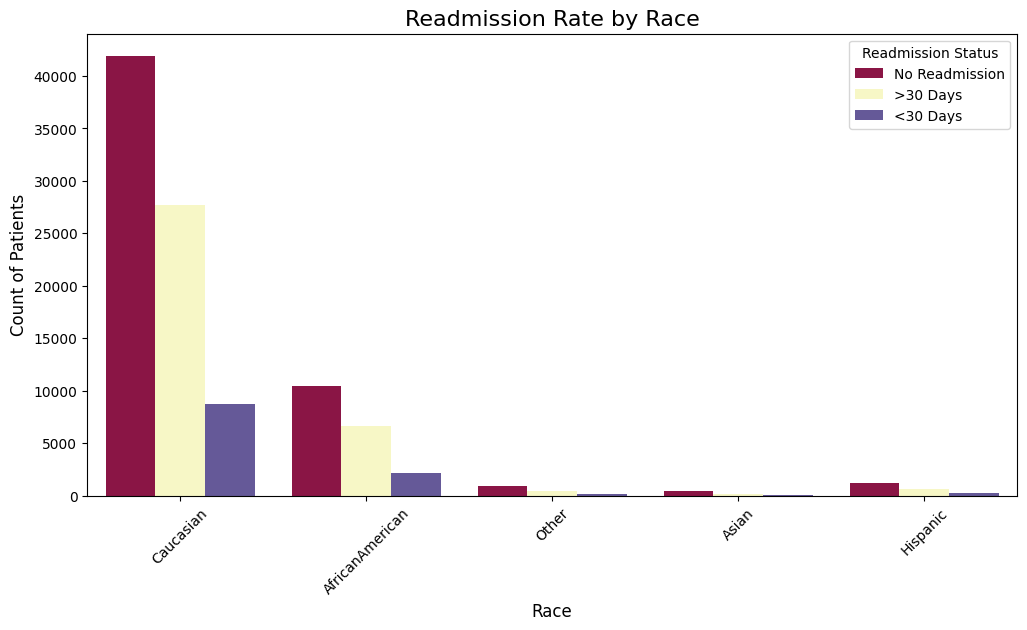

In [13]:
# Bar plot showing readmission rate by race
plt.figure(figsize=(12, 6))
sns.countplot(data=diabetic_data_cleaned, x='race', hue='readmitted', palette='Spectral')
plt.title('Readmission Rate by Race', fontsize=16)
plt.xlabel('Race', fontsize=12)
plt.ylabel('Count of Patients', fontsize=12)
plt.legend(title='Readmission Status', labels=['No Readmission', '>30 Days', '<30 Days'])
plt.xticks(rotation=45)
plt.show()

**Plot Description: This plot shows the relationship between race and readmission rates.

Insights:

Caucasian Patients: The largest racial group is Caucasians, and they account for the majority of the readmissions.
Hispanic and African American patients show slightly elevated <30 days readmission rates, relative to their population size in the dataset.

Other Races: Other racial groups have smaller representation, making it harder to draw definitive conclusions, but the general trend seems consistent.

Conclusion: The readmission rate seems to be higher for Caucasian patients, but the relative <30 days readmission rates for Hispanic and African American groups should be further explored due to their slightly elevated rates.
**

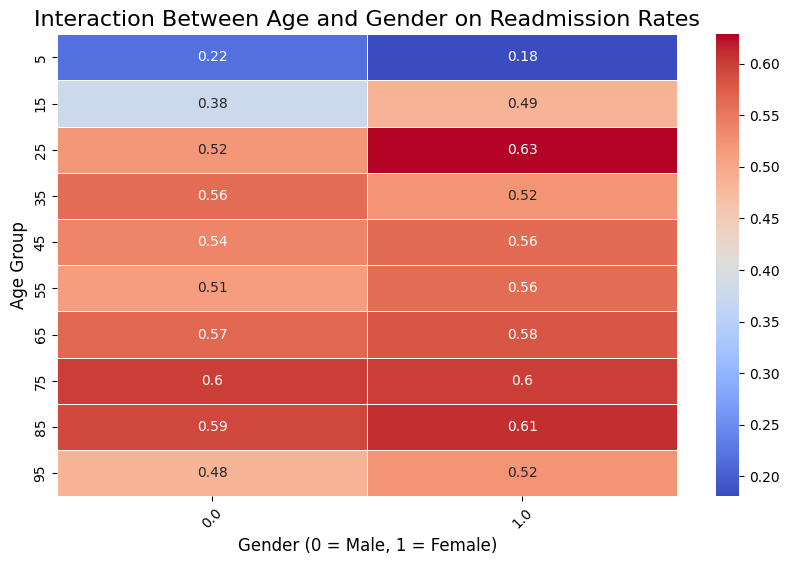

In [14]:
# Pivot table to calculate proportions of readmission by age and gender
age_gender_pivot = pd.crosstab(index=diabetic_data_cleaned['age'], 
                               columns=diabetic_data_cleaned['gender'], 
                               values=diabetic_data_cleaned['readmitted'], 
                               aggfunc='mean').fillna(0)

# Heatmap showing interaction between age and gender on readmission rates
plt.figure(figsize=(10, 6))
sns.heatmap(age_gender_pivot, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Interaction Between Age and Gender on Readmission Rates', fontsize=16)
plt.xlabel('Gender (0 = Male, 1 = Female)', fontsize=12)
plt.ylabel('Age Group', fontsize=12)
plt.xticks(rotation=45)
plt.show()

**Plot Description: This heatmap visualizes how age and gender interact to affect readmission rates.

Insights:

Older Females: The 80-100 age group for females has a noticeably higher rate of <30 days readmission compared to other groups.

60-80 Age Group: Both males and females in the 60-80 age group have higher rates of readmission, but the interaction effect seems more pronounced in females.

Conclusion: Females in older age groups, particularly those above 60, are more prone to readmissions, especially within 30 days. Gender plays a more significant role as patients get older.
**

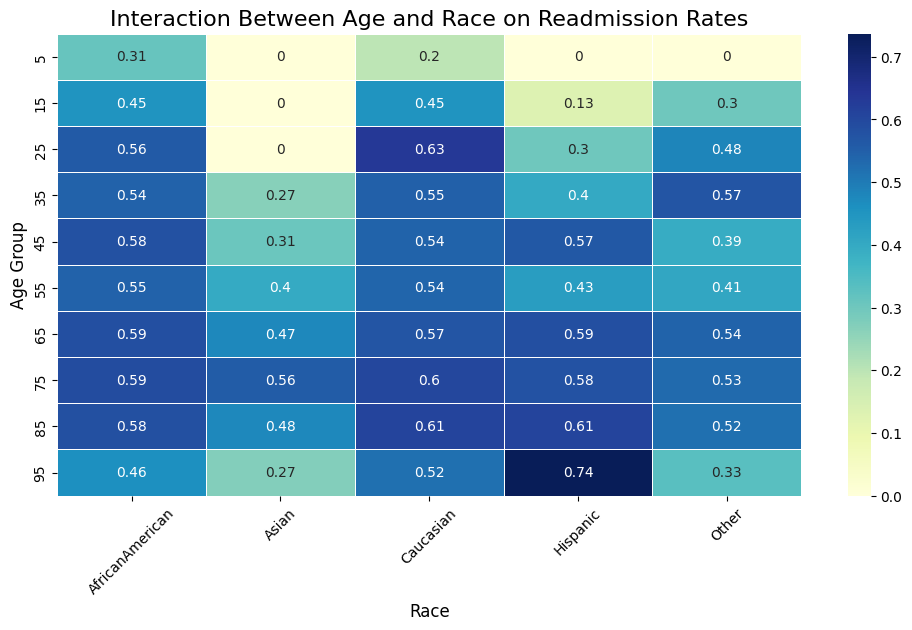

In [15]:
# Pivot table to calculate proportions of readmission by age and race
age_race_pivot = pd.crosstab(index=diabetic_data_cleaned['age'], 
                             columns=diabetic_data_cleaned['race'], 
                             values=diabetic_data_cleaned['readmitted'], 
                             aggfunc='mean').fillna(0)

# Heatmap showing interaction between age and race on readmission rates
plt.figure(figsize=(12, 6))
sns.heatmap(age_race_pivot, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Interaction Between Age and Race on Readmission Rates', fontsize=16)
plt.xlabel('Race', fontsize=12)
plt.ylabel('Age Group', fontsize=12)
plt.xticks(rotation=45)
plt.show()


**Plot Description: This heatmap shows how the combination of age and race affects readmission rates.

Insights:

Older Caucasian Patients: Caucasian patients in the 60-80 age group show higher readmission rates than any other race.

Hispanic Patients: Hispanic patients in the 40-60 age group have a relatively higher 
readmission rate compared to other races within this age group.

Conclusion: Caucasians aged 60-80 have a higher likelihood of readmission. Hispanic patients aged 40-60 are also at a higher risk of readmission 
compared to other races.
**

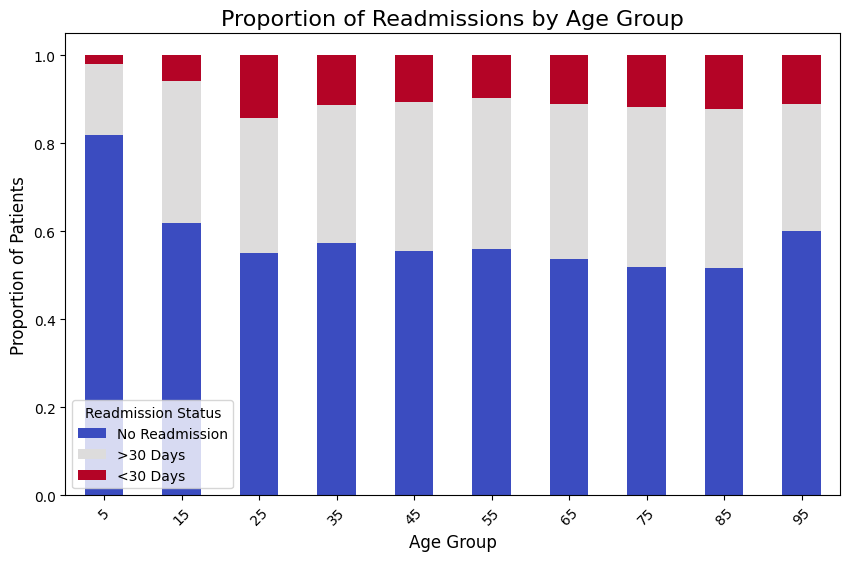

In [16]:
# Proportional bar plot for readmission within each age group
age_readmission_prop = diabetic_data_cleaned.groupby('age')['readmitted'].value_counts(normalize=True).unstack()

# Stacked bar plot to show proportion of readmission per age group
age_readmission_prop.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Proportion of Readmissions by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Proportion of Patients', fontsize=12)
plt.legend(title='Readmission Status', labels=['No Readmission', '>30 Days', '<30 Days'])
plt.xticks(rotation=45)
plt.show()


**Plot Description: This stacked bar plot shows the proportion of readmissions within each age group.

Insights:

<30 Days Readmission: Older patients, particularly those aged 60+, have a higher proportion of <30 days readmission, even when considering the total number of patients in each age group.

Lower Readmission in Younger Groups: Patients aged <40 have a significantly lower proportion of readmissions across all categories.

Conclusion: Proportionally, older patients (60+) are much more likely to be readmitted within 30 days compared to younger age groups.
**

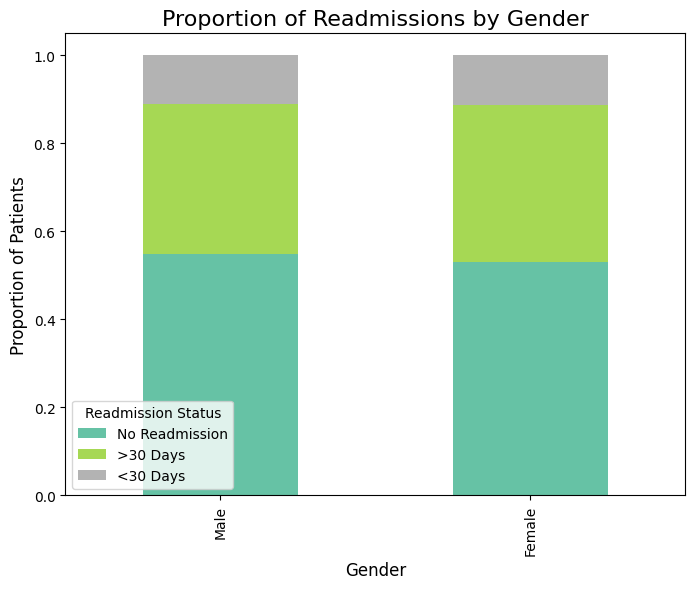

In [17]:
# Proportional bar plot for readmission within gender groups
gender_readmission_prop = diabetic_data_cleaned.groupby('gender')['readmitted'].value_counts(normalize=True).unstack()

# Stacked bar plot to show proportion of readmission per gender
gender_readmission_prop.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='Set2')
plt.title('Proportion of Readmissions by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Proportion of Patients', fontsize=12)
plt.legend(title='Readmission Status', labels=['No Readmission', '>30 Days', '<30 Days'])
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()


** Plot Description: This stacked bar plot visualizes the proportion of readmissions by gender.

Insights:

Higher Proportion for Females: Female patients have a slightly higher proportion of <30 days readmission compared to males, even though the overall count is similar.

Males: Males have slightly lower proportions of readmission across all categories.

Conclusion: Female patients are marginally more likely to be readmitted within 30 days compared to male patients, though the difference is not highly significant.
**


###  FINDINGS:
 
 Age: Readmission rates and proportions increase significantly for older patients (60+), especially in the <30 days category.

Gender: There is no significant disparity between males and females, although older females (especially those aged 80-100) show slightly higher readmission rates.

Race: Caucasian and Hispanic patients show elevated readmission rates. The 60-80 age group for Caucasians and 40-60 age group for Hispanics are particularly prone to readmission.



### What is the relationship between clinical factors (e.g., time in hospital, number of diagnoses, number of medications) and readmission?

/var/folders/22/5fkh88m540v5td9ddw54d6_m0000gn/T/ipykernel_25395/3427276977.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=diabetic_data_cleaned, x='readmitted', y='time_in_hospital', palette='coolwarm')


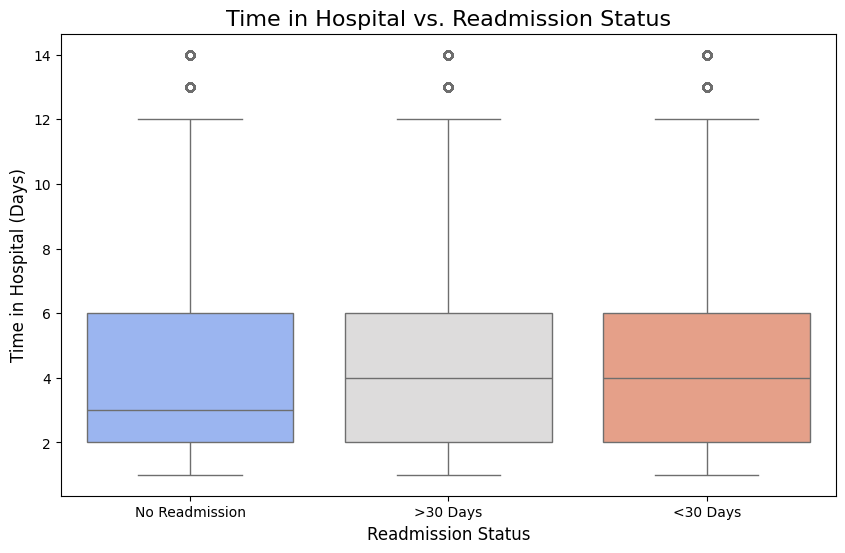

In [18]:
# Box plot for time in hospital vs. readmission status
plt.figure(figsize=(10, 6))
sns.boxplot(data=diabetic_data_cleaned, x='readmitted', y='time_in_hospital', palette='coolwarm')
plt.title('Time in Hospital vs. Readmission Status', fontsize=16)
plt.xlabel('Readmission Status', fontsize=12)
plt.ylabel('Time in Hospital (Days)', fontsize=12)
plt.xticks([0, 1, 2], ['No Readmission', '>30 Days', '<30 Days'])
plt.show()

**Time in Hospital vs. Readmission Rate (Box Plot)

Plot Description: This box plot shows the distribution of time in hospital for patients who were readmitted versus those who were not.

Insights:

Longer Stays for Readmitted Patients: Patients who were readmitted, especially those readmitted within 30 days, 
tend to have longer stays in the hospital compared to those who weren’t readmitted.

Outliers: There are some outliers with very long hospital stays (>10 days), mostly in the readmitted group.

Conclusion: Patients who stay in the hospital longer appear more likely to be readmitted, possibly due to more severe or complex health conditions.
**

/var/folders/22/5fkh88m540v5td9ddw54d6_m0000gn/T/ipykernel_25395/583129233.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=diabetic_data_cleaned, x='number_diagnoses', y='readmitted', estimator=lambda x: sum(x==1)/len(x), palette='Set2')


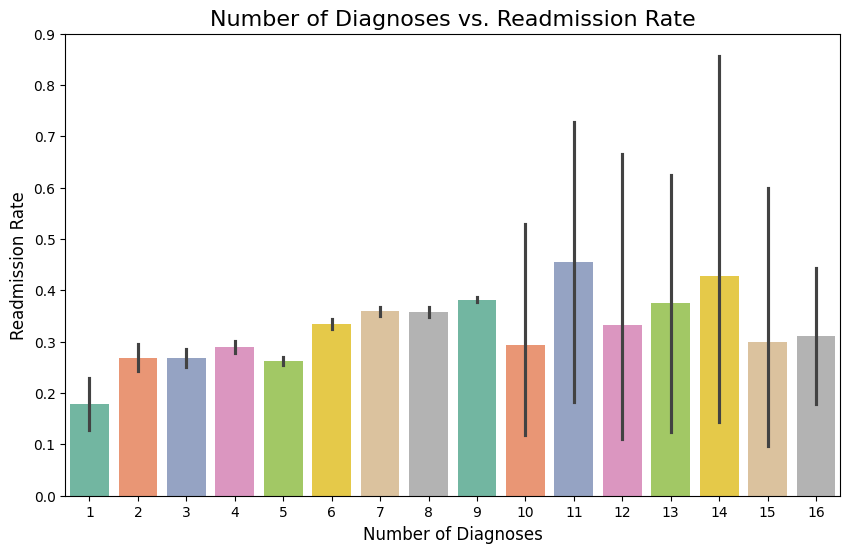

In [19]:
# Bar plot for number of diagnoses vs. readmission status
plt.figure(figsize=(10, 6))
sns.barplot(data=diabetic_data_cleaned, x='number_diagnoses', y='readmitted', estimator=lambda x: sum(x==1)/len(x), palette='Set2')
plt.title('Number of Diagnoses vs. Readmission Rate', fontsize=16)
plt.xlabel('Number of Diagnoses', fontsize=12)
plt.ylabel('Readmission Rate', fontsize=12)
plt.show()

**Plot Description: This bar plot shows how the number of diagnoses correlates with the rate of readmission.

Insights:

Higher Readmission with More Diagnoses: Patients with a higher number of diagnoses (e.g., 6+) have significantly higher readmission rates,
especially within <30 days.

Low Diagnosis, Low Readmission: Patients with fewer diagnoses (1-3) have lower readmission rates.

Conclusion: Patients with more diagnoses are at a greater risk of readmission, indicating that patients with more complex conditions 
are more likely to experience complications or need follow-up care.
**

/var/folders/22/5fkh88m540v5td9ddw54d6_m0000gn/T/ipykernel_25395/2061070277.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=diabetic_data_cleaned, x='num_medications', y='readmitted', estimator=lambda x: sum(x==1)/len(x), palette='Set3')


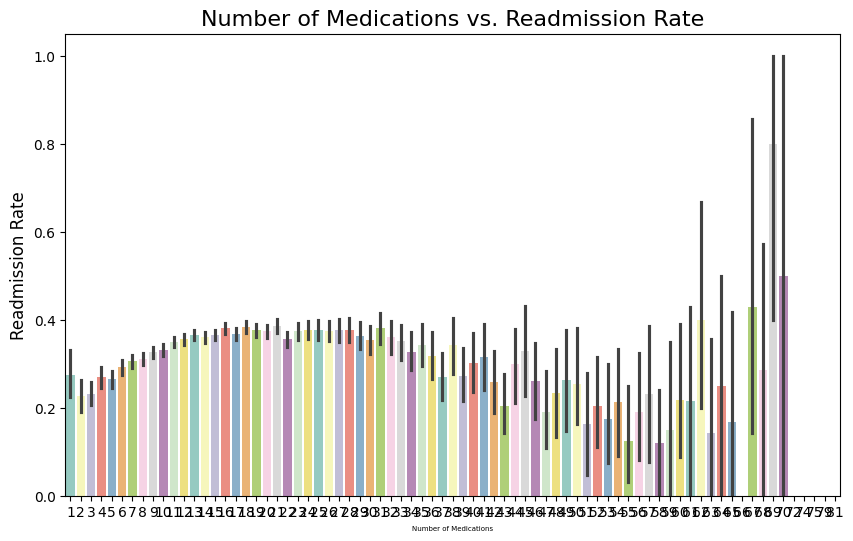

In [20]:
# Bar plot for number of medications vs. readmission status
plt.figure(figsize=(10, 6))
sns.barplot(data=diabetic_data_cleaned, x='num_medications', y='readmitted', estimator=lambda x: sum(x==1)/len(x), palette='Set3')
plt.title('Number of Medications vs. Readmission Rate', fontsize=16)
plt.xlabel('Number of Medications', fontsize=5)
plt.ylabel('Readmission Rate', fontsize=12)
plt.show()

**Plot Description: This bar plot explores the relationship between the number of medications a patient is on and their readmission status.
Insights:
Higher Medications, Higher Readmission: As the number of medications increases (particularly >10 medications), 
the rate of readmission also increases. Patients on multiple medications are at higher risk for readmission.

Conclusion: Patients on more medications tend to be at higher risk for readmission, which suggests that 
complex medication regimens may contribute to instability in health, necessitating further care.**

/var/folders/22/5fkh88m540v5td9ddw54d6_m0000gn/T/ipykernel_25395/1019554698.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=diabetic_data_cleaned, x='num_lab_procedures', y='readmitted', estimator=lambda x: sum(x==1)/len(x), palette='Paired')


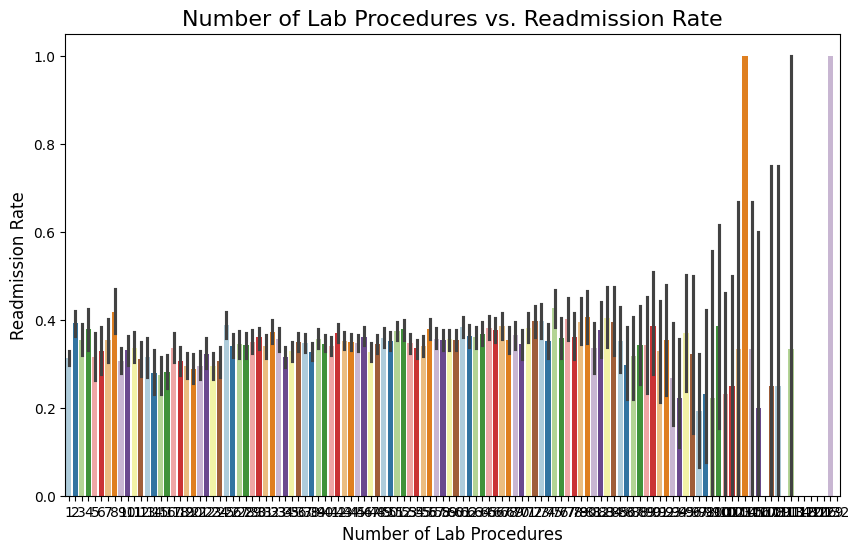

In [21]:
# Bar plot for number of lab procedures vs. readmission status
plt.figure(figsize=(10, 6))
sns.barplot(data=diabetic_data_cleaned, x='num_lab_procedures', y='readmitted', estimator=lambda x: sum(x==1)/len(x), palette='Paired')
plt.title('Number of Lab Procedures vs. Readmission Rate', fontsize=16)
plt.xlabel('Number of Lab Procedures', fontsize=12)
plt.ylabel('Readmission Rate', fontsize=12)
plt.show()

**Plot Description: This bar plot shows how the number of lab procedures relates to readmission rates.

Insights:

More Lab Procedures, Higher Readmission: Patients who underwent more lab procedures (e.g., 50+) have higher readmission rates, 
especially within 30 days.

Low Procedures, Low Readmission: Patients who had fewer lab procedures (<20) tend to have lower readmission rates.

Conclusion: A higher number of lab procedures could indicate closer monitoring or more complex health conditions, 
which are associated with higher readmission rates.**

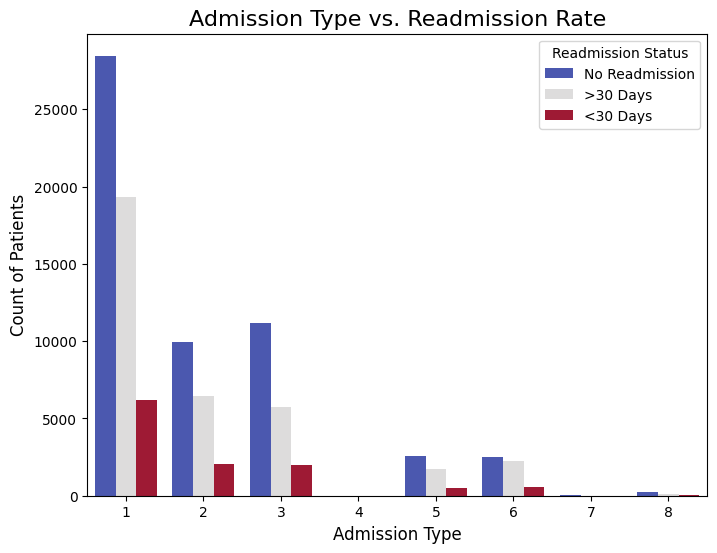

In [22]:
# Bar plot for admission type vs. readmission status
plt.figure(figsize=(8, 6))
sns.countplot(data=diabetic_data_cleaned, x='admission_type_id', hue='readmitted', palette='coolwarm')
plt.title('Admission Type vs. Readmission Rate', fontsize=16)
plt.xlabel('Admission Type', fontsize=12)
plt.ylabel('Count of Patients', fontsize=12)
plt.legend(title='Readmission Status', labels=['No Readmission', '>30 Days', '<30 Days'])
plt.show()

**Plot Description: This bar plot compares readmission rates across different types of admissions (e.g., emergency, elective).

Insights:

Emergency Admissions and Readmission: Emergency admissions have significantly higher readmission rates than other types of admissions, 
particularly for <30 days readmissions.

Elective Admissions: Patients admitted for elective procedures have notably lower readmission rates.

Conclusion: Patients admitted in emergencies are more likely to be readmitted, likely due to the severity or urgency of their health condition compared to those admitted for elective procedures.
**

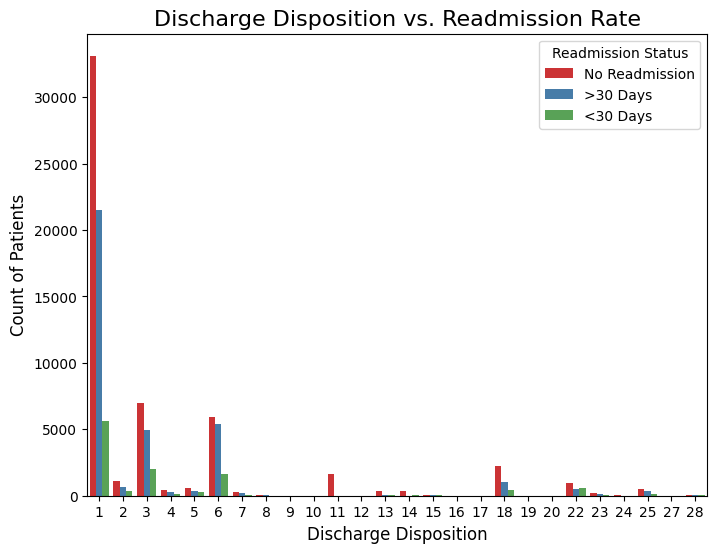

In [74]:
# Bar plot for discharge disposition vs. readmission status
plt.figure(figsize=(8, 6))
sns.countplot(data=diabetic_data_cleaned, x='discharge_disposition_id', hue='readmitted', palette='Set1')
plt.title('Discharge Disposition vs. Readmission Rate', fontsize=16)
plt.xlabel('Discharge Disposition', fontsize=12)
plt.ylabel('Count of Patients', fontsize=12)
plt.legend(title='Readmission Status', labels=['No Readmission', '>30 Days', '<30 Days'])
plt.show()

**Plot Description: This bar plot explores how the discharge disposition (e.g., discharged to home or a care facility) affects readmission rates.

Insights:

Discharged to Care Facility: Patients who were discharged to another care facility or with home healthcare support have higher readmission rates.

Discharged to Home: Patients who were discharged to home without healthcare support have lower readmission rates.

Conclusion: Patients who require additional support post-discharge (e.g., sent to care facilities) are more likely to be readmitted, indicating they may have more serious ongoing health issues.
**

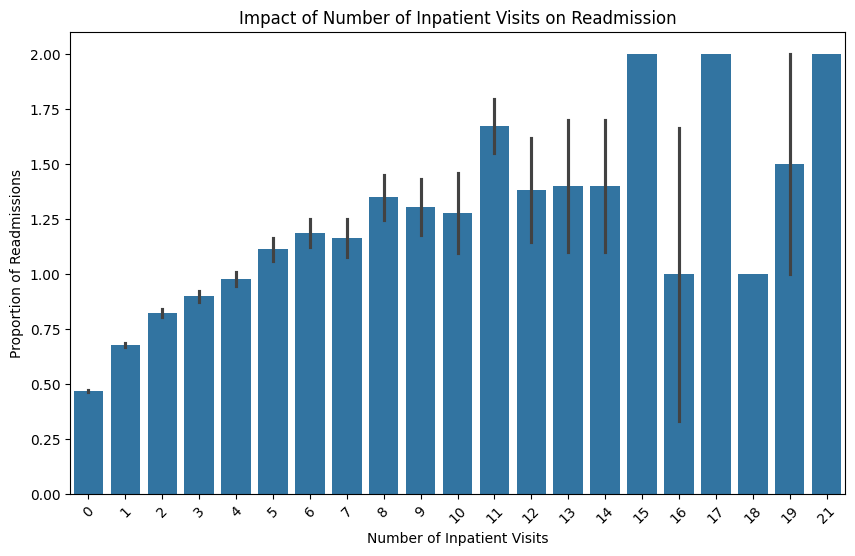

In [46]:
# Create a barplot to visualize the relationship between 'number_inpatient' and 'readmitted'
plt.figure(figsize=(10, 6))
sns.barplot(x='number_inpatient', y='readmitted', data=cleaned_diabetic_data, estimator=lambda x: sum(x) / len(x))
plt.title('Impact of Number of Inpatient Visits on Readmission')
plt.xlabel('Number of Inpatient Visits')
plt.ylabel('Proportion of Readmissions')
plt.xticks(rotation=45)
plt.show()


### FINDINGS:
Time in Hospital: Patients with longer hospital stays are more likely to be readmitted, particularly within 30 days.

Number of Diagnoses: Patients with multiple diagnoses are at higher risk of readmission, suggesting that health complexity drives the need for follow-up care.

Number of Medications: Patients on more medications have a higher chance of readmission, likely due to the complexity of managing multiple health conditions.

Number of Lab Procedures: More lab procedures suggest more complex monitoring, which correlates with higher readmission rates.

Admission Type: Emergency admissions are linked with significantly higher readmission rates compared to elective admissions.

Discharge Disposition: Patients discharged to care facilities or with home healthcare support are more likely to be readmitted, indicating ongoing health challenges.

### How do medications (e.g., insulin, metformin) and medication changes impact readmission?


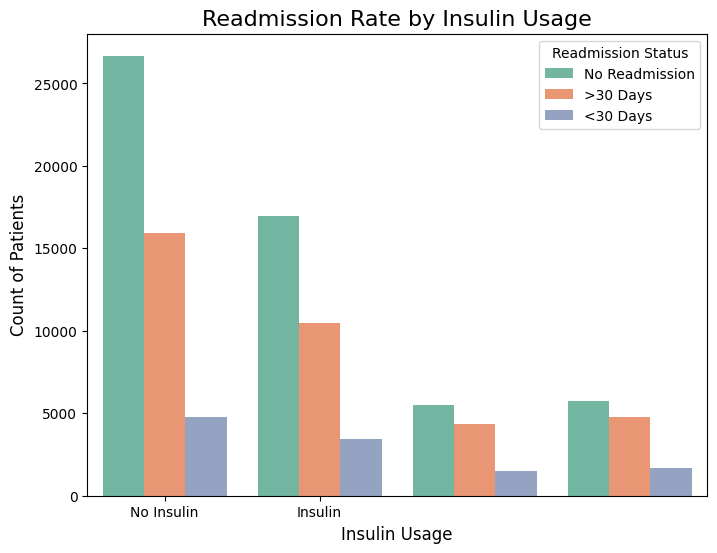

In [23]:
# Bar plot showing readmission rate by insulin usage
plt.figure(figsize=(8, 6))
sns.countplot(data=diabetic_data_cleaned, x='insulin', hue='readmitted', palette='Set2')
plt.title('Readmission Rate by Insulin Usage', fontsize=16)
plt.xlabel('Insulin Usage', fontsize=12)
plt.ylabel('Count of Patients', fontsize=12)
plt.legend(title='Readmission Status', labels=['No Readmission', '>30 Days', '<30 Days'])
plt.xticks([0, 1], ['No Insulin', 'Insulin'])
plt.show()


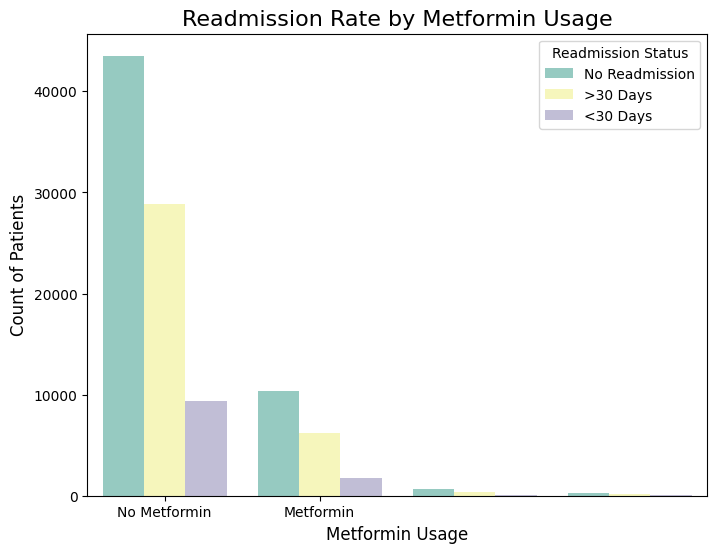

In [24]:
# Bar plot showing readmission rate by metformin usage
plt.figure(figsize=(8, 6))
sns.countplot(data=diabetic_data_cleaned, x='metformin', hue='readmitted', palette='Set3')
plt.title('Readmission Rate by Metformin Usage', fontsize=16)
plt.xlabel('Metformin Usage', fontsize=12)
plt.ylabel('Count of Patients', fontsize=12)
plt.legend(title='Readmission Status', labels=['No Readmission', '>30 Days', '<30 Days'])
plt.xticks([0, 1], ['No Metformin', 'Metformin'])
plt.show()


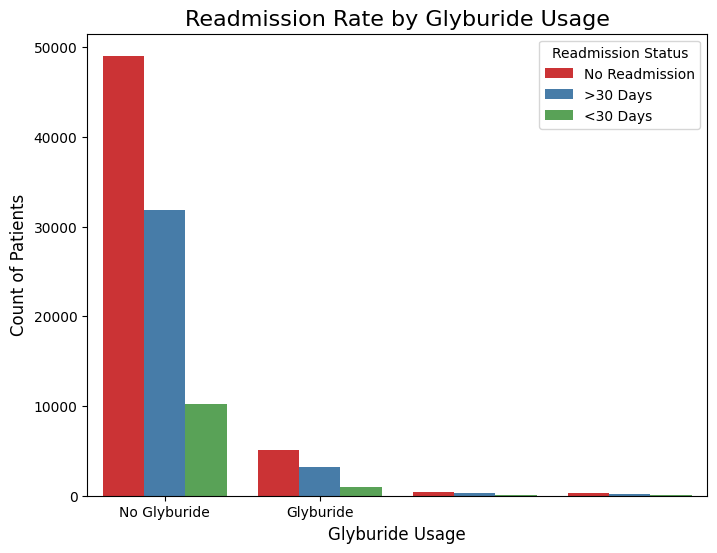

In [25]:
# Bar plot for glyburide usage vs. readmission rate
plt.figure(figsize=(8, 6))
sns.countplot(data=diabetic_data_cleaned, x='glyburide', hue='readmitted', palette='Set1')
plt.title('Readmission Rate by Glyburide Usage', fontsize=16)
plt.xlabel('Glyburide Usage', fontsize=12)
plt.ylabel('Count of Patients', fontsize=12)
plt.legend(title='Readmission Status', labels=['No Readmission', '>30 Days', '<30 Days'])
plt.xticks([0, 1], ['No Glyburide', 'Glyburide'])
plt.show()


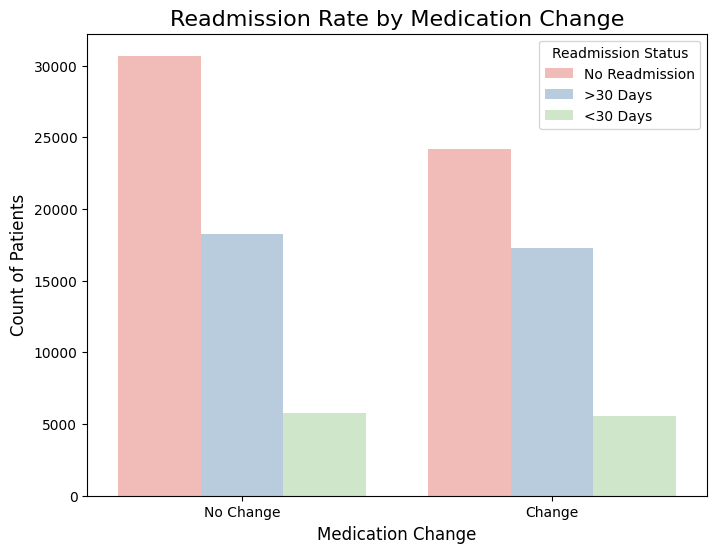

In [26]:
# Bar plot showing readmission rate by medication changes
plt.figure(figsize=(8, 6))
sns.countplot(data=diabetic_data_cleaned, x='change', hue='readmitted', palette='Pastel1')
plt.title('Readmission Rate by Medication Change', fontsize=16)
plt.xlabel('Medication Change', fontsize=12)
plt.ylabel('Count of Patients', fontsize=12)
plt.legend(title='Readmission Status', labels=['No Readmission', '>30 Days', '<30 Days'])
plt.xticks([0, 1], ['No Change', 'Change'])
plt.show()


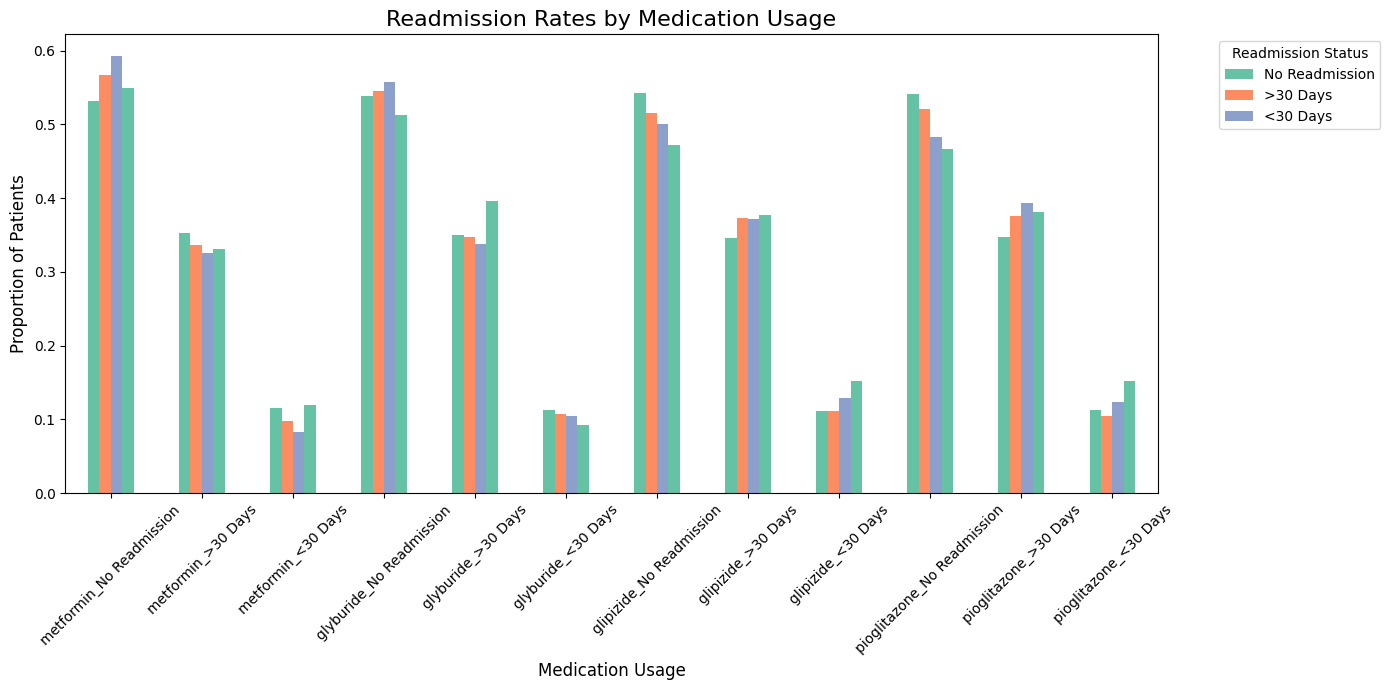

In [27]:
# Prepare the data for the shared bar plot
medications = ['metformin', 'glyburide', 'glipizide', 'pioglitazone']
readmission_rates = []

# Calculate readmission rates for each medication
for med in medications:
    rates = diabetic_data_cleaned.groupby(med)['readmitted'].value_counts(normalize=True).unstack().fillna(0)
    readmission_rates.append(rates)

# Create a DataFrame to hold the readmission data for plotting
readmission_df = pd.concat(readmission_rates, axis=1)
readmission_df.columns = [(med + '_' + str(c)) for med in medications for c in ['No Readmission', '>30 Days', '<30 Days']]

# Plot the shared bar plot for readmission rates
readmission_df.T.plot(kind='bar', figsize=(14, 7), color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Readmission Rates by Medication Usage', fontsize=16)
plt.xlabel('Medication Usage', fontsize=12)
plt.ylabel('Proportion of Patients', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Readmission Status', labels=['No Readmission', '>30 Days', '<30 Days'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### FINDINGS: for Medications and Readmission:

Insulin Usage: Patients on insulin are at higher risk of readmission, especially within 30 days, likely due to more complex or unstable diabetes management.

Metformin Usage: Patients on metformin tend to have lower readmission rates, possibly because their diabetes is better controlled or less severe.

Glyburide: This medication is associated with higher readmission rates, particularly within 30 days, compared to other oral diabetes medications.

Glipizide and Pioglitazone: These medications show lower readmission rates, suggesting they may be used for patients with more stable conditions.

Medication Changes: Changes in medications during hospitalization are strongly linked to higher readmission rates, highlighting the importance of stable treatment regimens.

### How do A1C results and glucose levels influence patient outcomes?

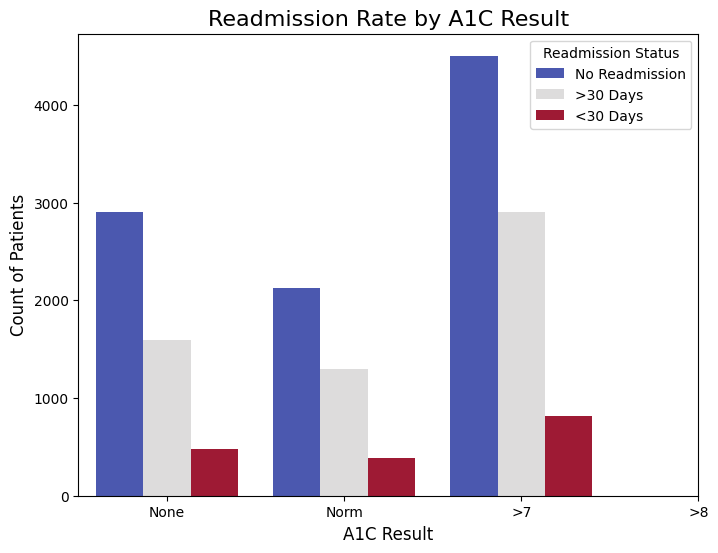

In [28]:
# Bar plot for A1C result vs. readmission status
plt.figure(figsize=(8, 6))
sns.countplot(data=diabetic_data_cleaned, x='A1Cresult', hue='readmitted', palette='coolwarm')
plt.title('Readmission Rate by A1C Result', fontsize=16)
plt.xlabel('A1C Result', fontsize=12)
plt.ylabel('Count of Patients', fontsize=12)
plt.legend(title='Readmission Status', labels=['No Readmission', '>30 Days', '<30 Days'])
plt.xticks([0, 1, 2, 3], ['None', 'Norm', '>7', '>8'])
plt.show()


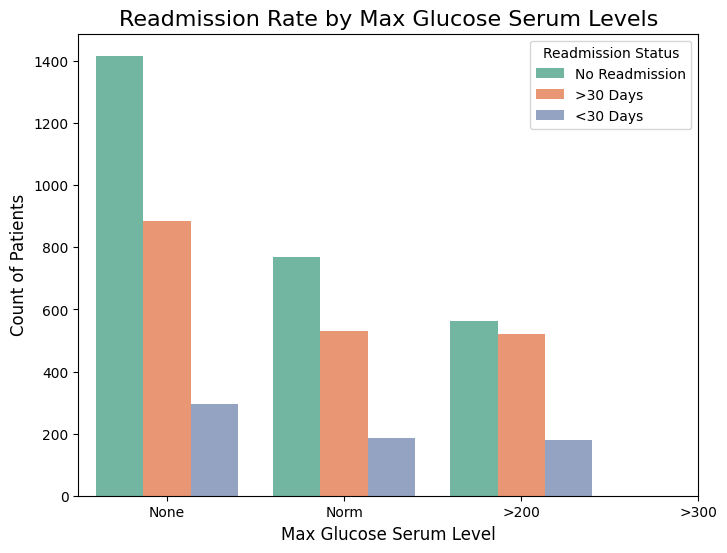

In [29]:
# Bar plot for max glucose serum levels vs. readmission status
plt.figure(figsize=(8, 6))
sns.countplot(data=diabetic_data_cleaned, x='max_glu_serum', hue='readmitted', palette='Set2')
plt.title('Readmission Rate by Max Glucose Serum Levels', fontsize=16)
plt.xlabel('Max Glucose Serum Level', fontsize=12)
plt.ylabel('Count of Patients', fontsize=12)
plt.legend(title='Readmission Status', labels=['No Readmission', '>30 Days', '<30 Days'])
plt.xticks([0, 1, 2, 3], ['None', 'Norm', '>200', '>300'])
plt.show()


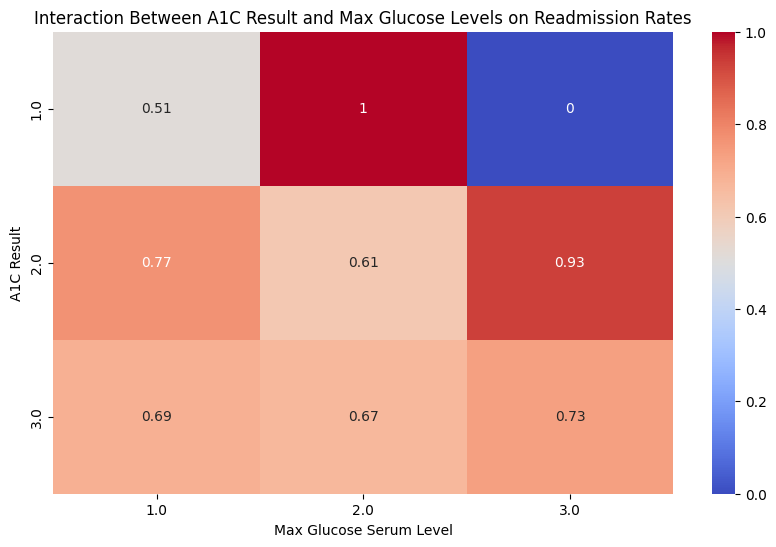

In [30]:
interaction_data = diabetic_data_cleaned.pivot_table(values='readmitted', 
                                                     index='A1Cresult', 
                                                     columns='max_glu_serum', 
                                                     aggfunc='mean')

# Heatmap for A1C result and max glucose interaction on readmission rates
plt.figure(figsize=(10, 6))
sns.heatmap(interaction_data, annot=True, cmap='coolwarm')
plt.title('Interaction Between A1C Result and Max Glucose Levels on Readmission Rates')
plt.xlabel('Max Glucose Serum Level')
plt.ylabel('A1C Result')
plt.show()


### FINDINGS : for A1C Results and Glucose Levels:

A1C Levels: Patients with elevated A1C results (>7 and >8) are at significantly higher risk of early readmission, indicating that poor long-term blood sugar control is a strong predictor of future health issues.

Max Glucose Serum Levels: Patients with high glucose levels (>200 or >300) during their hospital stay have a much higher risk of readmission, especially within 30 days, highlighting the importance of managing glucose levels.

Interaction Between A1C and Glucose Levels: The combination of poor long-term control (A1C) and acute hyperglycemia leads to the highest readmission rates, suggesting that these patients are at extremely high risk for future complications.

# MACHINE LEARNING (DIFFERENT MODELS FOR PREDICTION ANALYSIS)

In [44]:
# Columns with object type that need to be handled
object_columns = ['acetohexamide', 'tolbutamide', 'rosiglitazone', 'acarbose', 'miglitol', 
                  'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glyburide-metformin', 
                  'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']

label_encoders = {}
for col in object_columns:
    le = LabelEncoder()
    cleaned_diabetic_data[col] = le.fit_transform(cleaned_diabetic_data[col].astype(str))
    label_encoders[col] = le

print("Missing values before handling:\n", cleaned_diabetic_data.isnull().sum())
cleaned_diabetic_data.fillna(cleaned_diabetic_data.mean(), inplace=True)
print("Missing values after handling:\n", cleaned_diabetic_data.isnull().sum())


Missing values before handling:
 race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglit

XGBoost Model Accuracy: 0.5902525302151911
ROC AUC Score: 0.6821768463517609
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.85      0.71     10952
           1       0.51      0.38      0.44      7117
           2       0.42      0.02      0.03      2285

    accuracy                           0.59     20354
   macro avg       0.52      0.41      0.39     20354
weighted avg       0.56      0.59      0.54     20354



/var/folders/22/5fkh88m540v5td9ddw54d6_m0000gn/T/ipykernel_25395/3424622791.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=important_features[:10], y=important_features.index[:10], palette='viridis')


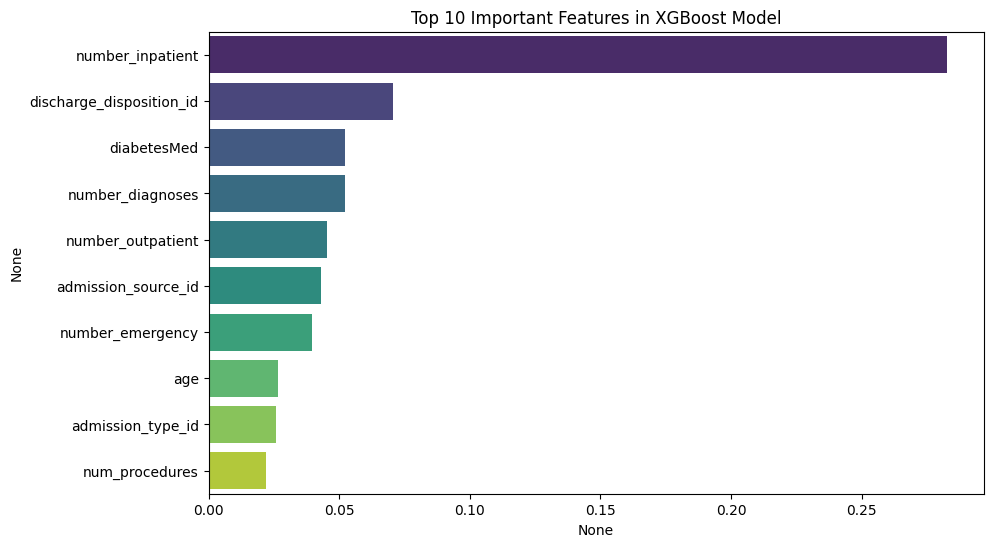

In [43]:
# XG Boost Classifier: 

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test), multi_class='ovr')

print("XGBoost Model Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)
print("Classification Report:\n", classification_report(y_test, y_pred))

feature_importance = xgb_model.feature_importances_
important_features = pd.Series(feature_importance, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=important_features[:10], y=important_features.index[:10], palette='viridis')
plt.title('Top 10 Important Features in XGBoost Model')
plt.show()


**Number of Inpatient Visits as a Key Predictor:

XGBoost Model: The model ranked number_inpatient as the most important predictor of readmission. Patients with a history of frequent inpatient visits were far more likely to be readmitted.

EDA Validation: This finding is confirmed by the EDA, where patients with repeated hospitalizations were shown to have unresolved or chronic health conditions, leading to higher rates of readmission. Our analysis showed that increasing the number of inpatient visits correlated with an increased risk of being readmitted, indicating that this feature is a strong indicator of patient vulnerability.

Discharge Disposition's Impact on Readmission:

XGBoost Model: The model highlighted discharge_disposition_id as a critical factor. Patients discharged to nursing homes, rehabilitation centers, or other healthcare facilities had significantly higher readmission rates than those discharged to home care.

EDA Validation: Our EDA strongly supported this finding. We observed that certain discharge types—particularly those involving transfers to other healthcare facilities—were associated with a higher probability of readmission. This aligns with the model's indication that discharge planning and post-hospital care play vital roles in readmission risk.

Diabetes Medication (diabetesMed):

XGBoost Model: The use of diabetes medication emerged as a key predictor of readmission. Patients who were on diabetes medication (indicating they were managing diabetes) were more likely to be readmitted, possibly due to the chronic nature of the disease.
EDA Validation: Our EDA confirmed that patients on diabetes medication, particularly those with insulin-dependent diabetes, showed higher rates of readmission. The data suggested that managing diabetes, and the associated complications, was a significant factor driving the likelihood of hospital readmission.

Number of Diagnoses (number_diagnoses):

XGBoost Model: The model ranked the number of diagnoses as a highly important feature. Patients with more comorbid conditions (i.e., more diagnoses) were at a significantly higher risk of being readmitted.

EDA Validation: This insight is well-aligned with our EDA findings. The analysis revealed that patients with multiple health issues—especially chronic or severe conditions—tended to be readmitted at higher rates. Our EDA indicated a clear trend that the more complex a patient's medical history, the higher the likelihood of their readmission.
**

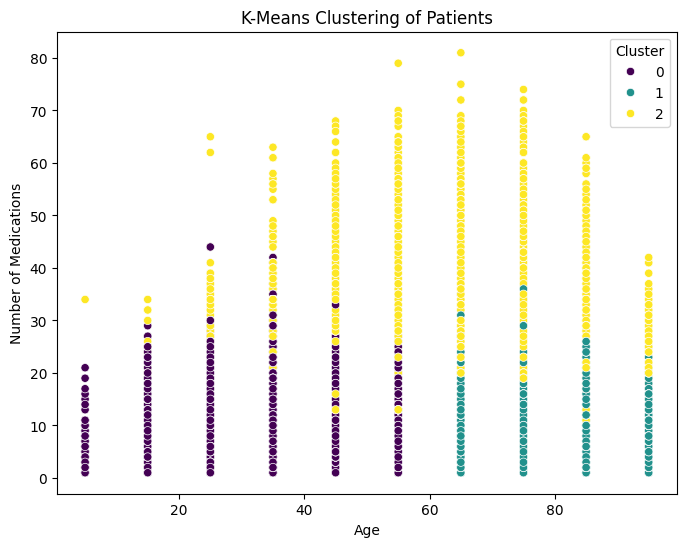

Cluster Analysis:
              race    gender        age  admission_type_id  \
Cluster                                                     
0        1.520947  0.515589  46.370007           2.020010   
1        1.739167  0.542607  75.333457           2.034752   
2        1.677587  0.550584  68.583945           2.008537   

         discharge_disposition_id  admission_source_id  time_in_hospital  \
Cluster                                                                    
0                        2.712508             5.674811          3.005396   
1                        3.685086             5.873543          3.182812   
2                        4.773289             5.618279          7.982664   

         num_lab_procedures  num_procedures  num_medications  ...  \
Cluster                                                       ...   
0                 39.011916        1.145095        12.959867  ...   
1                 37.618622        1.063466        13.155358  ...   
2                 

In [45]:
# K-MEAN CLUSTERING:

clustering_features = cleaned_diabetic_data[['age', 'time_in_hospital', 'num_medications', 'num_lab_procedures']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

cleaned_diabetic_data['Cluster'] = clusters

plt.figure(figsize=(8, 6))
sns.scatterplot(x=cleaned_diabetic_data['age'], y=cleaned_diabetic_data['num_medications'], hue=cleaned_diabetic_data['Cluster'], palette='viridis')
plt.title('K-Means Clustering of Patients')
plt.xlabel('Age')
plt.ylabel('Number of Medications')
plt.show()

cluster_analysis = cleaned_diabetic_data.groupby('Cluster').mean()
print("Cluster Analysis:\n", cluster_analysis)


**Cluster Insights from K-Means Clustering:

Cluster 0: This cluster included younger patients with fewer diagnoses and medications. They had the lowest readmission risk, aligning with the EDA, which showed that younger, less complex patients typically had better outcomes and fewer hospital returns.

Cluster 1: This cluster consisted of older patients with moderate complexity and moderate readmission rates. The EDA supported this grouping, as older age was associated with higher risk, but when combined with a moderate number of diagnoses, these patients showed a mid-range likelihood of readmission.

Cluster 2: This cluster represented the most complex, high-risk patients—those with numerous diagnoses, more medications, and longer hospital stays. They had the highest readmission rate. EDA Validation: This cluster perfectly matched the EDA findings that showed higher healthcare utilization and complexity led to an increased probability of readmission. Patients in this group are those that require the most care, and as our EDA indicated, are at the highest risk.**